---
# Distance Based Clustering
# k-Means Algorithmn

Is a method of vector quantization, and aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean

K-means finds cluster centers by minimizing the sum of squared distances from each point to its assigned cluster. Points are assigned to the cluster whose center is closest.

After initial centers are chosen, two steps repeat until the cluster assignment no longer changes for any point (which is equivalent to the cluster centers no longer moving):

![](../img/kmeans-alg.png)

<img src="../img/ad8.png" width="800">

## Choosing k  
In k-means for anomaly detection we must choose a value for k in advance and the final results are sensitive to initialization and often terminates at a local optimum. This is still an active area of research and no definitive answers. In general, a large k probably decreases the error but increases the risk of overfitting.

- No observable target to predict.
- The elbow method
- Heuristic
K = maxArg(sqrt(n/2), 1)

## Use case
##### Wine dataset
The Wine data set is a multivariate data set introduced by M. Forina et al. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. [Info here ](https://pythonhosted.org/bob/temp/bob.db.wine/doc/index.html)

In [1]:
import pandas as pd
dataset = pd.read_csv('../datasets/wine_parvus.csv')

In [2]:
dataset.columns

Index(['Variety', 'Variety name', 'Alcohol', 'Malic acid', 'Ash',
       'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
       'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [3]:
dataset.head()

,Variety,Variety name,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,Babera,11.50,2.01,2.46,17.04,106.34,2.84,2.98,0.29,1.90,11.80,1.06,3.16,1115.71
1,1,Babera,14.23,1.71,2.43,15.60,127.00,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.00
2,1,Babera,13.20,1.78,2.14,11.20,100.00,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.00
3,1,Babera,13.16,2.36,2.67,18.60,101.00,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.00
4,1,Babera,14.37,1.95,2.50,16.80,113.00,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.00


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

In [6]:
X = dataset[['Alcohol','Color intensity']]

In [7]:
X.describe()

,Alcohol,Color intensity
count,180.000000,180.000000
mean,13.010056,5.071889
std,0.849337,2.381056
min,11.030000,0.800000
25%,12.355000,3.200000
50%,13.050000,4.690000
75%,13.682500,6.212500
max,16.200000,13.000000


## Standard Scaler

<img src="../img/standard.png" width="400">

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Prior number of Clusters**

In [9]:
K = int(np.sqrt(len(dataset) / 2.0))

In [10]:
print('Number of Clusters K: {}'.format(K))

Number of Clusters K: 9


**Importing KMeans Class **

In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters = K)

fit_predict to fit model and obtain cluster labels

In [13]:
clusters = model.fit_predict(X_scaled)

In [14]:
clusters

array([5, 3, 2, 2, 1, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3,
       2, 2, 3, 3, 3, 3, 1, 4, 3, 1, 3, 3, 3, 3, 2, 1, 8, 8, 7, 2, 7, 8,
       7, 2, 7, 2, 8, 8, 2, 2, 2, 0, 0, 2, 0, 8, 8, 0, 7, 0, 2, 0, 8, 8,
       0, 0, 0, 0, 0, 8, 8, 0, 8, 0, 8, 7, 8, 0, 8, 8, 0, 8, 8, 8, 8, 8,
       0, 0, 8, 0, 0, 0, 0, 0, 8, 8, 0, 0, 7, 8, 8, 0, 0, 7, 0, 8, 0, 2,
       7, 7, 7, 7, 4, 8, 7, 2, 7, 2, 2, 2, 2, 4, 2, 3, 4, 1, 5, 1, 5, 4,
       5, 4, 4, 1, 4, 5, 5, 4, 3, 7, 2, 1, 3, 5, 5, 1, 1, 7, 5, 1, 1, 1,
       5, 5, 1, 6], dtype=int32)

Adding the labels to the dataset

In [15]:
dataset['cluster_id'] = clusters

In [16]:
dataset.groupby('cluster_id').count()['Variety'].reset_index()

,cluster_id,Variety
0,0,28
1,1,19
2,2,36
3,3,32
4,4,9
5,5,11
6,6,1
7,7,16
8,8,28


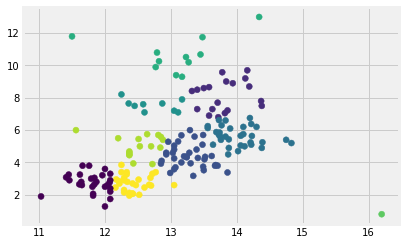

In [17]:
plt.scatter(dataset['Alcohol'], dataset['Color intensity'], c=clusters)

**Making groups**

In [18]:
groups = dataset.groupby(['cluster_id','Variety']).count()['Variety name'].reset_index()
groups.columns = ['cluster_id','Variety','count']

In [19]:
groups.head()

,cluster_id,Variety,count
0,0,2,28
1,1,1,9
2,1,3,10
3,2,1,20
4,2,2,8


In [20]:
anomalies = groups[groups['count'] == 1]

In [21]:
anomalies

,cluster_id,Variety,count
8,4,1,1
10,5,1,1
12,6,3,1
16,8,3,1


In [22]:
dataset['Variety'].unique()

array([1, 2, 3])

In [23]:
g1 = anomalies.iloc[:,0].values
g2 = anomalies.iloc[:,1].values

In [24]:
anomalies_df = pd.DataFrame()
for i, j in zip(g1, g2):
    anomalies_df = anomalies_df.append(dataset[
        (dataset['cluster_id'] == i) & (dataset['Variety'] == j)])

In [25]:
anomalies_df

,Variety,Variety name,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster_id
51,1,Babera,13.05,1.73,2.04,12.40,92.00,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150.00,4
0,1,Babera,11.50,2.01,2.46,17.04,106.34,2.84,2.98,0.29,1.90,11.80,1.06,3.16,1115.71,5
179,3,Grignolino,16.20,3.33,2.44,21.42,99.31,1.68,0.78,0.45,1.15,0.80,0.68,1.68,629.90,6
137,3,Grignolino,12.25,4.72,2.54,21.00,89.00,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.00,8


In [26]:
dataset['anomaly'] = [1 if i in anomalies_df.index else 0 for i in dataset.index]   

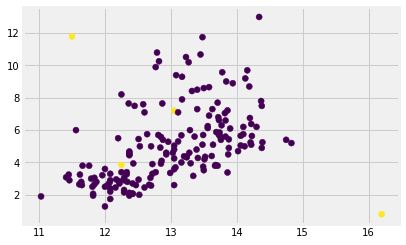

In [27]:
plt.scatter(dataset['Alcohol'], dataset['Color intensity'], c=dataset['anomaly'])

## Silhoutte Distance

Silhoutte Distance is used to study the separation between clusters. It can be used to evaluate and select the number of clusters. 
The value of $s(i)$ ranges from:

$$-1\le s\left(i\right)\le1$$

The value will be close to 1 when $b(i) >> a(i)$. That is when the nearest neighbor of point $i$ is very far & the members of clusters that $i$ is a part of aren't very far apart. This is the case when the clustering has worked well. 

The opposite case is when the value is close to -1. This happens when $a(i) >> b(i)$. That is when the the average distance of point within cluster is more than that of the neighboring one, then this indicates that the current point would do better if it is assigned to the neighboring one. 

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
scores = []
for K in range(2, 30):
    model = KMeans(n_clusters = K)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

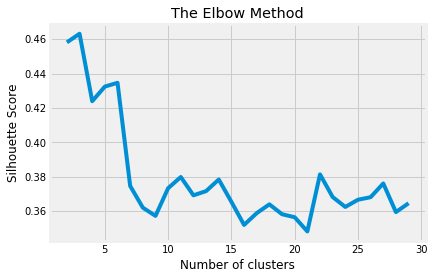

In [30]:
plt.plot(range(2, 30), scores)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

---
# Density Based Clustering
# DBSCAN 

Short for Density-Based Spatial Clustering of Applications with Noise, is the most popular density-based clustering method. We attempt to capture our intuition that a cluster is a region of the data space where there are lots of points, surrounded by a region where there are few points.

The goal is to identify dense regions, which can be measured by the number of objects close to a given point.

Parameters:  
**Epsilon (ε):** Is the radius of neighborhood around a point x. It is called called the ε − neighborhood of x.  
**Minimum points (MinPts):** Is the minimum number of neighbors within ε radius.

Any point x in the dataset, with a neighbor count greater than or equal to MinPts, is marked as a core point. We say that x is border point, if the number of its neighbors is less than MinPts, but it belongs to the
ε − neighborhood of some core point xi. Finally, if a point is neither a core nor a border point, then it is called a noise point or anomalous.

![](../img/ad10.png)

- The number of clusters does not need to be known a priori.
- Recovers much more flexible cluster shapes than K-means, which can
only find spherical clusters.
- Intrinsically finds and labels outliers as such, making it a great solution for anomaly detection.
- It works with any distance function. (e.g. "euclidean", "manhattan", "jaccard", and "levenshtein" )

## Comparison of methods

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [33]:
import pandas as pd
import numpy as np

In [34]:
dataset = pd.read_csv('../datasets/moons.csv')

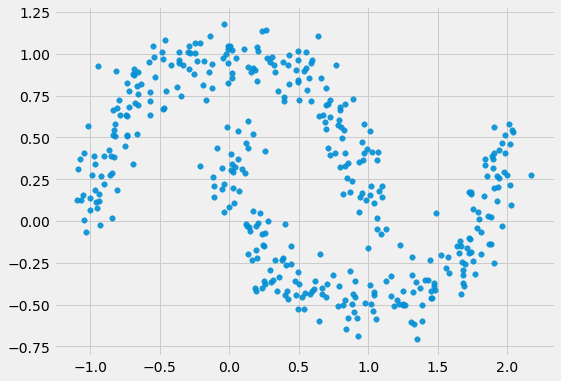

In [35]:
plt.figure(figsize=[8, 6])
plt.scatter(dataset['0'], dataset['1'], s=30, alpha=0.9)

How would it work with K-means?

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset)

In [37]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)
clusters = model.fit_predict(X_scaled)

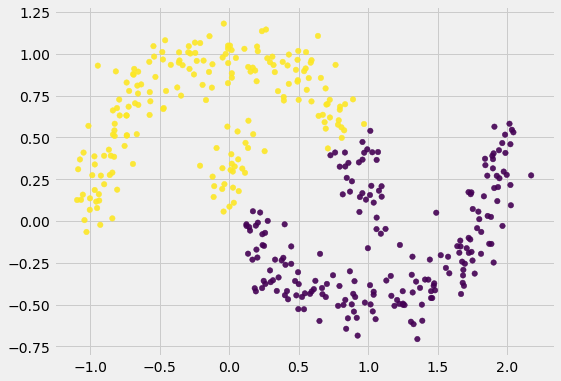

In [38]:
plt.figure(figsize=[8, 6])
plt.scatter(dataset['0'], dataset['1'], s=30, alpha=0.9, c=clusters)

Now let's see with DBSCAN

In [39]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=4) #radius and min_core_neighbors

In [40]:
clusters = dbscan.fit_predict(X_scaled)

In [41]:
set(clusters)

{-1, 0, 1}

To compute DBSCAN we’ll go point by point and check if it is a core point or not. If it is a core point we will create a new cluster, then search through all of its neighbors. We’ll add the neighborhoods of all these points to the cluster. If one of the points is a core point as well, it’s neighborhood will be added to our search. This will continue until we cannot reach anymore points. Then we’ll move on to the next point that we haven’t visited/labeled yet.

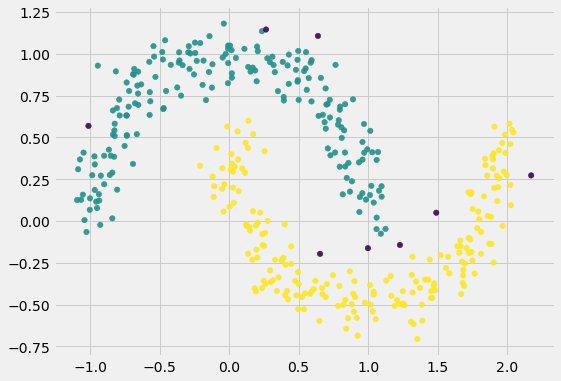

In [42]:
plt.figure(figsize=[8, 6])
plt.scatter(dataset['0'], dataset['1'], s=30, alpha=0.9, c=clusters)

### Expected anomalies

![](../img/sigmas.png)

In [43]:
expected = int(round(len(dataset)*(1-.954),0))
expected

18

In [44]:
anomalies = []
for e in np.arange(0.1, 1, 0.01):
    for m in range(1,10):
        model = DBSCAN(eps=e, min_samples = m)
        clusters = model.fit_predict(X_scaled)
        unique, counts = np.unique(clusters, return_counts=True)
        anomalies.append((e,m,counts[0]))
grid_table = pd.DataFrame(anomalies)
grid_table.columns = ['eps','min_neigh','noise']

In [45]:
grid_table_exp = grid_table[grid_table.noise < expected]

In [46]:
grid_table_exp.head()

,eps,min_neigh,noise
46,0.15,2,17
55,0.16,2,14
56,0.16,3,16
64,0.17,2,12
65,0.17,3,14


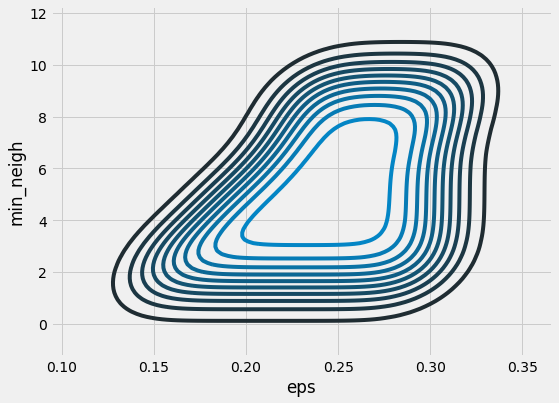

In [47]:
plt.figure(figsize=[8, 6])
sns.kdeplot(grid_table_exp.eps, grid_table_exp.min_neigh)

- Affinity Propagation
- Mean Shift
- Spectral Clustering
- Agglomerative Clustering
- HDBSCAN  
[Here](https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html)